<p style = 'font-size:40px'> <strong>Integrating Python and Oracle Databases</strong></p>

<p style = 'font-size:30px'> <strong> Introduction</strong> </p>

* <p style = 'font-size:20px'> The goal of this project is to demonstrate Python's capability to interact with Oracle Databases through the usage of cx_Oracle library. </p>
* <p style = 'font-size:20px'> To do this, I have simulated a situation in which I work for a hardware selling company that needs to get a variety of data about its performance. My role is to get access to the company's Oracle database in order to get the information demanded. </p>
* <p style = 'font-size:20px'> You can find the user's table diagram below </p>

<img src='database.png'>

<p style = 'font-size:30px'> <strong>Project's tasks</strong> </p>

* <p style = 'font-size:20px'> I've got the following tasks: </p>
<p style = 'font-size:20px'> 1) Obtain the level of storage of each of the company's warehouses.  </p>
<p style = 'font-size:20px'> 2) List the most prolific salespeople. </p>
<p style = 'font-size:20px'> 3) Point out the product with most units sold for each of the company's customers. </p>
<p style = 'font-size:20px'> 4) Get the annual revenue per product category.  </p>
<p style = 'font-size:20px'> 5) Increase all CPU products price by 10%. </p>

<p style = 'font-size:30px'><strong>Connecting to the company's data</strong></p>

In [1]:
# Firstly we need to inform some informations about the Data Source Name (DSN)
# We are going to create a variable that stores all the informations related to our DSN
# You must pass the host name, the port number and the service name of the database

import cx_Oracle
dsn = cx_Oracle.makedsn('localhost.localdomain', 1521, service_name = 'orcl')

In [3]:
# Now, we are going to connect us to the user in which the demanded data can be find. Its name is 'OT'.
# If you are uncomfortable in whowing the user's password in your code, you can use the getpass object from thet getpass library.

from getpass import getpass
password  = getpass('Write your database password:')

connection = cx_Oracle.connect('OT', password, dsn = dsn)

Write your database password: ······


<p style = 'font-size:30px'> <strong> Now let's get our data! </strong></p>

<p style = 'font-size:30px'> <em> Task 1 <span style = 'font-size:15px'>Obtain the storage level of each of the company's warehouses. </span></em> </p>

In [11]:
# Since the company has 8 warehouses, we are going to create a subplots figure. Each subplot will present the storage levels for
                                                                                                                    # each warehouse

# We also are going to create a list containg the position of each subplot in our figure.
l = [(i,j) for i in range(2) for j in range(4)]
print(l)

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


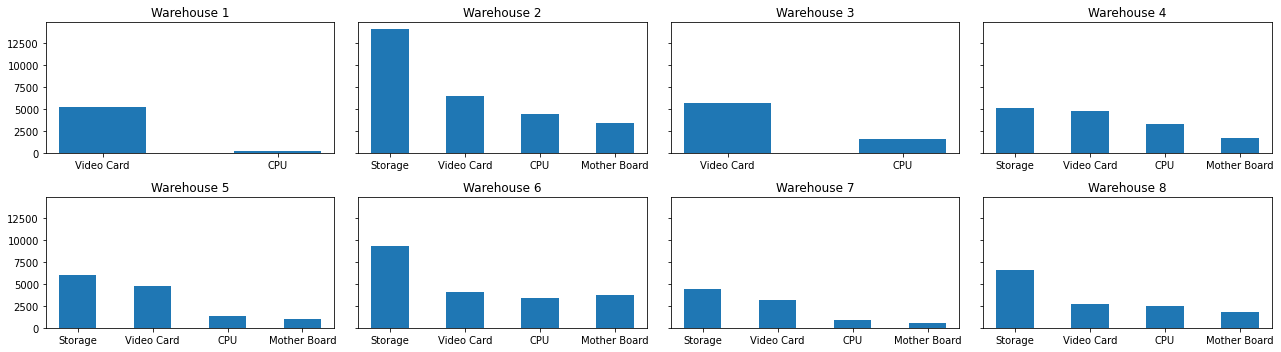

In [13]:
# Now, we are going to iterate over that list and plot the storage level for each product category available.
# We are going to use the enumerate method so we can take advantage of the list's indices to perform our queries.
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18,5), sharey=True)

for i, position in enumerate(l):
      
    query = f'''SELECT I.WAREHOUSE_ID, PC.CATEGORY_NAME, SUM(I.QUANTITY)
    FROM PRODUCT_CATEGORIES PC, PRODUCTS P, INVENTORIES I
    WHERE P.CATEGORY_ID=PC.CATEGORY_ID
    AND P.PRODUCT_ID=I.PRODUCT_ID
    AND WAREHOUSE_ID={i+1}
    GROUP BY I.WAREHOUSE_ID, PC.CATEGORY_NAME
    '''
    # Each time our query is run, pandas will create a DataFrame that contains the storage levels for each warehouse.
    table = pd.read_sql(query, connection)
    # We are going to use the table's information to plot a chart for every single warehouse.
    ax[position].bar(table['CATEGORY_NAME'], table['SUM(I.QUANTITY)'],width=0.5)
    ax[position].set_title(f'Warehouse {i+1}') 

plt.tight_layout()
fig.show()